In [2]:
CONFIG_PATH = "configs/tmp.yml"

In [4]:

from utils import get_config
from superdebug import debug
from process_data import get_model_input
config = get_config(CONFIG_PATH) # default config
target, original_feature_map, categorical_features, string_features, train_data, test_data, test_data_info, train_submission_upvote_df, num_all_users = get_model_input(config)

------------------ 2022-07-30 05:32:37 ------------------
DEBUG: 1 vars: ['custom_config'], at /home/TableSense/largedisk/wanrong/Curation-Modeling/utils.py:24 get_config
0 / 2.  custom_config dict {...} with 19 keys ['prepared_data_path', 'sample_method', 'categorical_features', 'string_features', 'model_type', 'encoder_hidden_dim', 'language_model_encoder_name', 'sample_ratio', 'train_at_least_n_votes', 'l2_normalization', 'train_test_different_submissions', 'learning_rate', 'num_epochs', 'downvote_weight', 'user_normalization', 'batch_size', 'sample_part_voted_users', 'use_voted_users_feature', 'add_target_user_ratio']
    prepared_data_path str len 25: data/reddit/tmp_linear.pt
    sample_method list size: 1 val: ['SUBMISSION_ID']
    categorical_features list size: 5 val: ['USERNAME', 'AUTHOR', 'SUBMISSION_ID', 'SUBREDDIT', 'NSFW']
    string_features list size: 0 []
    model_type str len 6: linear
    encoder_hidden_dim num val: 128
    language_model_encoder_name str len 15: be

In [10]:
train_data.loc[395167]

SUBMISSION_ID                                                 187537
SUBREDDIT                                                      17230
CREATED_TIME                                             1.58317e+09
USERNAME                                                       20233
VOTE                                                               1
TITLE                               (F) Risky exhib in public toilet
AUTHOR                                                         29937
#_COMMENTS                                                        12
NSFW                                                               0
SCORE                                                            243
UPVOTED_%                                                       0.98
LINK               https://www.reddit.com/r/gwpublic/comments/fce...
SUBMISSION_TEXT                     (F) Risky exhib in public toilet
Name: 395167, dtype: object

In [ ]:
from collections import Counter, defaultdict, OrderedDict
debug(train_upvote = sum(train_data["VOTE"] == 1),
    train_downvote = sum(train_data["VOTE"] == 0),
    test_upvote = sum(test_data["VOTE"] == 1),
    test_downvote = sum(test_data["VOTE"] == 0),
    )
user_votes = Counter()
submission_votes = Counter()
subreddit_subreddit_votes = defaultdict(Counter)
for row_i, row in train_data.iterrows():
    submission_votes[row["SUBMISSION_ID"]] += 1
    user_votes[row["USERNAME"]] += 1
    subreddit_subreddit_votes[row["SUBREDDIT"]][row["VOTE"]] += 1
    if "users" not in subreddit_subreddit_votes[row["SUBREDDIT"]]:
        subreddit_subreddit_votes[row["SUBREDDIT"]]["users"] = set()
    subreddit_subreddit_votes[row["SUBREDDIT"]]["users"].add(row["USERNAME"])


------------------ 2022-07-20 17:21:38 ------------------
DEBUG: 4 vars: ['train_upvote', 'train_downvote', 'test_upvote', 'test_downvote'], at <ipython-input-6-bf241b5dc052>:5 <module>
0 / 2.  train_upvote num val: 20684
1 / 3.  train_downvote num val: 20504
2 / 4.  test_upvote num val: 5227
3 / 5.  test_downvote num val: 5071
------------------ 2022-07-20 17:21:38 ------------------


------------------ 2022-07-20 17:21:45 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-7-43b29e4ea0c5>:12 draw_histogram
0 / 6.  distribution str len 924: OrderedDict([(1, 1280), (2, 2580), (3, 687), (4, 757), (5, 375), (6, 337), (7, 222), (8, 178), (9, 121), (10, 110), (11, 106), (12, 79), (13, 54), (14, 57), (15, 44), (16, 40), (17, 30), (18, 44), (19, 31), (20, 19), (21, 26), (22, 17), (23, 14), (24, 16), (25, 10), (26, 17), (27, 7), (28, 14), (29, 11), (30, 9), (31, 13), (32, 6), (33, 8), (34, 1), (35, 8), (36, 9), (37, 7), (38, 3), (39, 4), (40, 5), (41, 3), (42, 2), (43, 2), (44, 3), (45, 4), (46, 4), (47, 6), (48, 4), (49, 2), (50, 3), (51, 4), (52, 1), (53, 4 ... (170, 1), (257, 1)])
------------------ 2022-07-20 17:21:45 ------------------


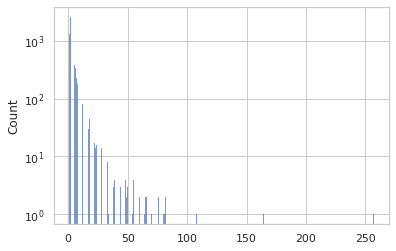

------------------ 2022-07-20 17:21:47 ------------------
DEBUG: at <ipython-input-7-43b29e4ea0c5>:18 draw_histogram
Figure saved in output/user_votes_distribution.png
------------------ 2022-07-20 17:21:47 ------------------
------------------ 2022-07-20 17:21:48 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-7-43b29e4ea0c5>:12 draw_histogram
0 / 7.  distribution str len 856: OrderedDict([(5, 3), (6, 6), (7, 10), (8, 20), (9, 24), (10, 30), (11, 42), (12, 43), (13, 72), (14, 72), (15, 86), (16, 106), (17, 80), (18, 79), (19, 73), (20, 84), (21, 75), (22, 65), (23, 84), (24, 55), (25, 55), (26, 41), (27, 59), (28, 40), (29, 35), (30, 34), (31, 31), (32, 25), (33, 20), (34, 26), (35, 14), (36, 13), (37, 15), (38, 5), (39, 11), (40, 9), (41, 4), (42, 10), (43, 14), (44, 11), (45, 7), (46, 8), (47, 7), (48, 9), (49, 4), (50, 1), (51, 3), (52, 2), (53, 2), (54, 2), (55, 2), (56, 5), (57, 2), ... (209, 1), (214, 1)])
------------------ 2022-07-20 17:21:48 ------------

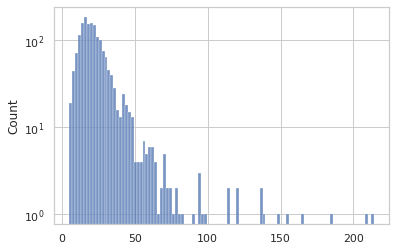

------------------ 2022-07-20 17:21:48 ------------------
DEBUG: at <ipython-input-7-43b29e4ea0c5>:18 draw_histogram
Figure saved in output/submission_votes_distribution.png
------------------ 2022-07-20 17:21:48 ------------------


In [ ]:
from importlib_metadata import distribution
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
def draw_histogram(nums:list, file_name):
    sns.set_theme(style="whitegrid")
    ax = sns.histplot(data=nums)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    distribution = OrderedDict(sorted(list(Counter(nums).items())))
    debug(distribution=str(distribution))
    # ax.text(-0.15, 1.1, distribution, fontsize=7, transform=ax.transAxes)
    save_path = f"output/{file_name}.png"
    plt.show()
    plt.savefig(save_path, dpi = 300)
    plt.close()
    debug(f"Figure saved in {save_path}")

draw_histogram(list(user_votes.values()), "user_votes_distribution")
draw_histogram(list(submission_votes.values()), "submission_votes_distribution")

In [ ]:
for subreddit in subreddit_subreddit_votes:
    subreddit_subreddit_votes[subreddit]["downvote_rate"] = 100 * subreddit_subreddit_votes[subreddit][0] / (subreddit_subreddit_votes[subreddit][1] + subreddit_subreddit_votes[subreddit][0])
    subreddit_subreddit_votes[subreddit]["subreddit"] = original_feature_map["SUBREDDIT"][subreddit]
    subreddit_subreddit_votes[subreddit]["users"] = str(subreddit_subreddit_votes[subreddit]["users"])
subreddit_subreddit_votes = pd.DataFrame(list(subreddit_subreddit_votes.values())).set_index("subreddit")
debug(subreddit_votes=subreddit_subreddit_votes)
save_path = "output/subreddit_votes_users.csv"
subreddit_subreddit_votes.to_csv(save_path)
debug(f"Votes of each subreddit is saved to {save_path}")

------------------ 2022-07-20 17:21:48 ------------------
DEBUG: 1 vars: ['subreddit_votes'], at <ipython-input-8-301709a3aa7a>:6 <module>
0 / 8.  subreddit_votes pandas.core.frame.DataFrame with props ['_is_copy', '_mgr', '_item_cache', '_attrs'] val:                            0  \
subreddit                      
r/AskReddit           1364.0   
r/pics                3304.0   
r/politics            2545.0   
r/worldnews           2082.0   
r/UpliftingNews         75.0   
...                      ...   
r/memes                  7.0   
r/quityourbullshit       5.0   
r/facepalm              12.0   
r/PraiseTheCameraMan    14.0   
r/dataisbeautiful        NaN   

                                                                  users     1  \
subreddit                                                                       
r/AskReddit           {2049, 6147, 2052, 4, 4102, 7, 4103, 4101, 615...   493   
r/pics                {0, 1, 5, 9, 17, 24, 26, 31, 33, 35, 37, 38, 3...  2802   
r/poli